In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

In [ ]:
vdem = pd.read_csv('V-Dem-CY-Full+Others-v14.csv')

<ipython-input-2-838d4f9b21c3>:1: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem = pd.read_csv('V-Dem-CY-Full+Others-v14.csv')


In [ ]:
m = pd.read_csv('model_dataset (2).csv')

<ipython-input-6-3e35c0a77e36>:1: DtypeWarning: Columns (766,767,807,808,810,811,813,816,818) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv('model_dataset (2).csv')


In [ ]:
m.describe()

,Unnamed: 0_x,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,...,Outgoing_Hindu,Incoming_Hindu,Outgoing_Jew,Incoming_Jew,Outgoing_Muslim,Incoming_Muslim,Outgoing_Other,Incoming_Other,Outgoing_Unaffiliated,Incoming_Unaffiliated
count,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,4492.000000,...,5.936000e+03,5.936000e+03,5936.000000,5.936000e+03,5.936000e+03,5.936000e+03,5.936000e+03,5936.000000,5.936000e+03,5.936000e+03
mean,13667.818156,96.736881,1992.536956,0.006338,0.418678,1868.147824,2022.737720,1910.344487,2022.737720,1802.082814,...,6.591560e+04,6.589117e+04,18161.219677,1.879464e+04,2.935040e+05,3.124250e+05,2.244104e+04,23157.850404,1.625329e+05,1.627628e+05
std,7331.586082,57.743616,18.437591,0.112414,0.493365,61.466914,3.108226,22.461710,3.108226,22.611022,...,4.475276e+05,3.411650e+05,37787.939114,1.159869e+05,7.853025e+05,8.077273e+05,8.517565e+04,55608.877689,4.845886e+05,5.484090e+05
min,171.000000,3.000000,1960.000000,0.000000,0.000000,1789.000000,1975.000000,1900.000000,1975.000000,1789.000000,...,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03
25%,7487.000000,49.000000,1977.000000,0.000000,0.000000,1789.000000,2023.000000,1900.000000,2023.000000,1789.000000,...,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03
50%,14092.000000,92.000000,1993.000000,0.000000,0.000000,1900.000000,2023.000000,1900.000000,2023.000000,1789.000000,...,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,3.000000e+04,4.000000e+04,5.000000e+03,5000.000000,4.000000e+04,1.000000e+04
75%,19655.000000,140.000000,2009.000000,0.000000,1.000000,1903.000000,2023.000000,1912.000000,2023.000000,1811.000000,...,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,2.100000e+05,2.000000e+05,2.000000e+04,20000.000000,1.300000e+05,7.000000e+04
max,26334.000000,236.000000,2023.000000,2.000000,1.000000,2011.000000,2023.000000,2011.000000,2023.000000,1878.000000,...,7.610000e+06,4.720000e+06,270000.000000,1.560000e+06,8.090000e+06,1.082000e+07,1.570000e+06,730000.000000,7.150000e+06,6.620000e+06


In [ ]:
vdem = vdem[vdem['year'] >=1960]

In [ ]:
og_keys = vdem.keys()
og_keys

Index(['country_name', 'country_text_id', 'country_id', 'year',
       'historical_date', 'project', 'historical', 'histname', 'codingstart',
       'codingend',
       ...
       'e_mipopula', 'e_miurbani', 'e_pefeliex', 'e_wb_pop', 'e_pechmor',
       'e_miinteco', 'e_civil_war', 'e_miinterc', 'e_pt_coup',
       'e_pt_coup_attempts'],
      dtype='object', length=4607)

In [ ]:
keys = list(vdem.keys())
len(keys)

4607

# **Choose Features Here**

In [ ]:
dash_keys = ['country_name', 'country_text_id', 'country_id', 'year',
             'v2x_mpi', 'e_lexical_index', 'v2x_libdem', 'v2x_civlib','v2xcl_rol', 'v2x_egaldem',
                'e_fh_pr', 'e_fh_cl', 'e_fh_status', 'v2x_accountability', 'e_wb_pop']

In [ ]:
dash_keys

['country_name',
 'country_text_id',
 'country_id',
 'year',
 'v2x_mpi',
 'e_lexical_index',
 'v2x_libdem',
 'v2x_civlib',
 'v2xcl_rol',
 'v2x_egaldem',
 'e_fh_pr',
 'e_fh_cl',
 'e_fh_status',
 'v2x_accountability',
 'e_wb_pop']

In [ ]:
vdem = vdem[dash_keys]

In [ ]:
vdem.head()

,country_name,country_text_id,country_id,year,v2x_mpi,e_lexical_index,v2x_libdem,v2x_civlib,v2xcl_rol,v2x_egaldem,e_fh_pr,e_fh_cl,e_fh_status,v2x_accountability,e_wb_pop
171,Mexico,MEX,3,1960,0.011,3.0,0.106,0.474,0.478,0.114,NaN,NaN,NaN,-0.537,37771861.0
172,Mexico,MEX,3,1961,0.012,3.0,0.107,0.476,0.478,0.118,NaN,NaN,NaN,-0.522,38966049.0
173,Mexico,MEX,3,1962,0.012,3.0,0.107,0.476,0.478,0.118,NaN,NaN,NaN,-0.531,40195318.0
174,Mexico,MEX,3,1963,0.012,3.0,0.107,0.476,0.478,0.118,NaN,NaN,NaN,-0.519,41462373.0
175,Mexico,MEX,3,1964,0.011,3.0,0.106,0.461,0.467,0.118,NaN,NaN,NaN,-0.534,42771077.0


In [ ]:
m = m[['country_name', 'year', 'pred_cl', 'pred_pr', 'pred_status', 'pred_uds']]

In [ ]:
m.head()

,country_name,year,pred_cl,pred_pr,pred_status,pred_uds
0,Mexico,1960,3.0,5.0,2.0,-0.417334
1,Mexico,1961,3.0,5.0,2.0,-0.565273
2,Mexico,1962,3.0,5.0,2.0,-0.580328
3,Mexico,1963,3.0,5.0,2.0,-0.579806
4,Mexico,1964,3.0,5.0,2.0,-0.542526


In [ ]:
sorted(m['country_name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burma/Myanmar',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'German Democratic Republic',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland'

In [ ]:
dash_data = pd.merge(vdem, m, on=['country_name', 'year'])

In [ ]:
sorted(dash_data['country_name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burma/Myanmar',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'German Democratic Republic',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland'

In [ ]:
countries = gpd.read_file('cshapes.geojson')

In [ ]:
countries = countries[['cntry_name', 'area', 'gwsyear', 'gweyear', 'geometry']]
countries.head()

,cntry_name,area,gwsyear,gweyear,geometry
0,United States of America,7940050.0,1886,1959,"MULTIPOLYGON (((-75.48306 35.34583, -75.44749 ..."
1,United States of America,9446290.0,1959,1959,"MULTIPOLYGON (((-87.45593 30.29871, -87.33416 ..."
2,United States of America,9462980.0,1959,2019,"MULTIPOLYGON (((-155.00558 19.32888, -154.8320..."
3,Alaska,1506240.0,1886,1959,"MULTIPOLYGON (((-177.8139 51.7197, -177.79724 ..."
4,Hawaii,16685.6,1898,1959,"MULTIPOLYGON (((-155.00558 19.32888, -154.8320..."


In [ ]:
#used this to match split countries to right name
countries[countries['cntry_name'].isin(('German Democratic Republic',
 'German Federal Republic',
 'Germany (Prussia)'))]

,cntry_name,area,gwsyear,gweyear,geometry
83,Germany (Prussia),540112.0,1886,1919,"MULTIPOLYGON (((12.36569 54.3052, 12.36569 54...."
84,Germany (Prussia),474783.0,1919,1920,"MULTIPOLYGON (((12.53337 54.46695, 12.52694 54..."
85,Germany (Prussia),470833.0,1920,1938,"MULTIPOLYGON (((12.36569 54.3052, 12.36569 54...."
86,Germany (Prussia),496652.0,1938,1945,"MULTIPOLYGON (((19.25333 54.27819, 19.23076 54..."
87,German Federal Republic,247663.0,1945,1949,"MULTIPOLYGON (((8.69277 54.89583, 8.66454 54.9..."
88,German Federal Republic,247663.0,1949,1990,"MULTIPOLYGON (((8.69277 54.89583, 8.66454 54.9..."
89,German Federal Republic,356917.0,1990,2019,"MULTIPOLYGON (((13.82708 54.14256, 13.82265 54..."
90,German Democratic Republic,109255.0,1945,1949,"MULTIPOLYGON (((13.82708 54.14256, 13.82265 54..."
91,German Democratic Republic,109255.0,1949,1990,"MULTIPOLYGON (((13.82708 54.14256, 13.82265 54..."


In [ ]:
#editing this for continuity in data, there should be a gap of half a year in reality
countries.loc[(countries['cntry_name']=='Czechoslovakia') & (countries['gwsyear']==1947), 'gweyear'] = 1993
countries.loc[(countries['cntry_name']=='Zambia') & (countries['gwsyear']==1911), 'gweyear'] = 1964

In [ ]:
cc_set = set(countries['cntry_name'])
dd_set = set(dash_data['country_name'].unique())

In [ ]:
cc_set - dd_set

{'Aden',
 'Alaska',
 'Austria-Hungary',
 'Bahamas',
 'Belarus (Byelorussia)',
 'Belize',
 'Bokhara',
 'Bosnia',
 'Bosnia-Herzegovina',
 'British Bechuanaland',
 'British Cameroons',
 'British Somaliland (Somaliland Republic)',
 'British Togoland',
 'Brunei',
 'Burkina Faso (Upper Volta)',
 'Cambodia (Kampuchea)',
 'Cape Colony',
 'Congo',
 'Congo, Democratic Republic of (Zaire)',
 "Cote D'Ivoire",
 'Czech Republic',
 'Czechoslovakia',
 'Danzig',
 'East Aden Protectorate',
 'East Timor',
 'Federated Malay States',
 'Federation of Rhodesia and Nyasaland',
 'Federation of South Arabia',
 'French Guyana',
 'French Polynesia',
 'French West Africa',
 'Gambia',
 'Gaza',
 'German Federal Republic',
 'German Solomon Islands',
 'German Togoland',
 'Germany (Prussia)',
 'Guadeloupe',
 'Hawaii',
 'Herzegovina',
 'Inini',
 'Iran (Persia)',
 'Italian Somaliland',
 'Italy/Sardinia',
 'Jammu and Kashmir',
 'Kamerun',
 'Kashmir (North, Azad)',
 'Khiva',
 'Korea',
 "Korea, People's Republic of",
 'Kore

In [ ]:
dd_set - cc_set

{'Belarus',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Burma/Myanmar',
 'Cambodia',
 'Czechia',
 'Democratic Republic of the Congo',
 'Eswatini',
 'Germany',
 'Hong Kong',
 'Iran',
 'Italy',
 'Ivory Coast',
 'Kyrgyzstan',
 'Madagascar',
 'North Korea',
 'North Macedonia',
 'Palestine/Gaza',
 'Palestine/West Bank',
 'Republic of Vietnam',
 'Republic of the Congo',
 'Romania',
 'Russia',
 'Sao Tome and Principe',
 'Seychelles',
 'Somaliland',
 'South Korea',
 'South Yemen',
 'Sri Lanka',
 'Suriname',
 'Tanzania',
 'The Gambia',
 'Timor-Leste',
 'Turkey',
 'Vanuatu',
 'Vietnam',
 'Yemen',
 'Zimbabwe'}

In [ ]:
#very annoying process of matching the countries
countries.loc[countries['cntry_name'] == 'United States', 'cntry_name'] = 'United States of America'
countries.loc[countries['cntry_name'] == 'Czechoslovakia', 'cntry_name'] = 'Czechia'
countries.loc[countries['cntry_name'] == 'Czech Republic', 'cntry_name'] = 'Czechia'
countries.loc[countries['cntry_name'] == 'Cabo Verde', 'cntry_name'] = 'Cape Verde'
countries.loc[countries['cntry_name'] == 'Congo, Democratic Republic of (Zaire)', 'cntry_name'] = 'Democratic Republic of the Congo'
countries.loc[countries['cntry_name'] == 'Congo', 'cntry_name'] = 'Republic of the Congo'
countries.loc[countries['cntry_name'] == 'Myanmar (Burma)', 'cntry_name'] = 'Burma/Myanmar'
countries.loc[countries['cntry_name'] == 'Turkey (Ottoman Empire)', 'cntry_name'] = 'Turkey'
countries.loc[countries['cntry_name'] == 'Russian Federation', 'cntry_name'] = 'Russia'
countries.loc[countries['cntry_name'] == 'Gambia', 'cntry_name'] = 'The Gambia'
countries.loc[countries['cntry_name'] == "Cote D'Ivoire", 'cntry_name'] = 'Ivory Coast'
countries.loc[countries['cntry_name'] == "Russia (Soviet Union)", 'cntry_name'] = 'Russia'
countries.loc[countries['cntry_name'] == 'Rumania', 'cntry_name'] = 'Romania'
countries.loc[countries['cntry_name'] == 'Zimbabwe (Rhodesia)', 'cntry_name'] = 'Zimbabwe'
countries.loc[countries['cntry_name'] == 'Italy/Sardinia', 'cntry_name'] = 'Italy'
countries.loc[countries['cntry_name'] == 'Yemen (Arab Republic of Yemen)', 'cntry_name'] = 'Yemen'
countries.loc[countries['cntry_name'] == 'Cambodia (Kampuchea)', 'cntry_name'] = 'Cambodia'
countries.loc[countries['cntry_name'] == 'Belarus (Byelorussia)', 'cntry_name'] = 'Belarus'
countries.loc[countries['cntry_name'] == 'Bosnia-Herzegovina', 'cntry_name'] = 'Bosnia and Herzegovina'
countries.loc[countries['cntry_name'] == 'Burkina Faso (Upper Volta)', 'cntry_name'] = 'Burkina Faso'
countries.loc[countries['cntry_name'] == 'Swaziland (Eswatini)', 'cntry_name'] = 'Eswatini'
countries.loc[countries['cntry_name'] == "Korea, People's Republic of", 'cntry_name'] = 'North Korea'
countries.loc[countries['cntry_name'] == "Korea, Republic of", 'cntry_name'] = 'South Korea'
countries.loc[countries['cntry_name'] == "Madagascar (Malagasy)", 'cntry_name'] = 'Madagascar'
countries.loc[countries['cntry_name'] == "Kyrgyz Republic", 'cntry_name'] = 'Kyrgyzstan'
countries.loc[countries['cntry_name'] == "Macedonia (FYROM/North Macedonia)", 'cntry_name'] = 'North Macedonia'
countries.loc[countries['cntry_name'] == "Sri Lanka (Ceylon)", 'cntry_name'] = 'Sri Lanka'
countries.loc[countries['cntry_name'] == "German Federal Republic", 'cntry_name'] = 'Germany'
countries.loc[countries['cntry_name'] == "Vietnam, Democratic Republic of", 'cntry_name'] = 'Vietnam'
countries.loc[countries['cntry_name'] == "Iran (Persia)", 'cntry_name'] = 'Iran'
countries.loc[countries['cntry_name'] == "Tanzania (Tanganyika)", 'cntry_name'] = 'Tanzania'
countries.loc[countries['cntry_name'] == "East Timor", 'cntry_name'] = 'Timor-Leste'
countries.loc[countries['cntry_name'] == "West Bank", 'cntry_name'] = 'Palestine/West Bank'
countries.loc[countries['cntry_name'] == "Federated Malay States", 'cntry_name'] = 'Malaysia'
countries.loc[countries['cntry_name'] == "West Irian (Dutch New Guinea)", 'cntry_name'] = 'Indonesia'
countries.loc[countries['cntry_name'] == "Vietnam, Republic of", 'cntry_name'] = 'Republic of Vietnam'
countries.loc[countries['cntry_name'] == "Yemen, People's Republic of", 'cntry_name'] = 'South Yemen'




In [ ]:
cc_set = set(countries['cntry_name'])
dd_set = set(dash_data['country_name'].unique())
dd_set - cc_set

{'Hong Kong',
 'Palestine/Gaza',
 'Sao Tome and Principe',
 'Seychelles',
 'Somaliland',
 'Suriname',
 'Vanuatu'}

In [ ]:
countries2 = gpd.read_file('World_Countries_Generalized.geojson')

In [ ]:
countries2 = countries2[['COUNTRY', 'geometry']]
countries2 = countries2[countries2['COUNTRY'].isin(('Sao Tome and Principe', 'Seychelles', 'Suriname', 'Vanuatu', 'Somaliland'))]
countries2.head()

,COUNTRY,geometry
197,Sao Tome and Principe,"MULTIPOLYGON (((6.52389 0.01834, 6.51653 0.019..."
201,Seychelles,"MULTIPOLYGON (((55.53249 -4.78916, 55.5243 -4...."
216,Suriname,"POLYGON ((-55.12796 5.82217, -55.10445 5.83944..."
243,Vanuatu,"MULTIPOLYGON (((167.10782 -15.1237, 167.13136 ..."


In [ ]:
cc2_set = set(countries2['COUNTRY'])

dd_set - cc_set - cc2_set

{'Hong Kong', 'Palestine/Gaza', 'Somaliland'}

In [ ]:
countries2.rename(columns={'COUNTRY': 'cntry_name'}, inplace=True)
countries2['gwsyear'] = (1960, 1960, 1960, 1980)
countries2['gweyear'] = (2024, 2024, 2024, 2024)
countries.drop(columns=['area'], inplace=True)
countries2.head()

,cntry_name,geometry,gwsyear,gweyear
197,Sao Tome and Principe,"MULTIPOLYGON (((6.52389 0.01834, 6.51653 0.019...",1960,2024
201,Seychelles,"MULTIPOLYGON (((55.53249 -4.78916, 55.5243 -4....",1960,2024
216,Suriname,"POLYGON ((-55.12796 5.82217, -55.10445 5.83944...",1960,2024
243,Vanuatu,"MULTIPOLYGON (((167.10782 -15.1237, 167.13136 ...",1980,2024


In [ ]:
joined = pd.concat([countries, countries2])
joined = joined[joined['cntry_name'].isin(dd_set)]
joined.loc[joined['gweyear'] == 2019, 'gweyear'] = 2024

In [ ]:
#getting rid of country shapes that are out of ur date range
joined = joined[joined['gweyear'] > 1959]
joined

,cntry_name,gwsyear,gweyear,geometry
2,United States of America,1959,2024,"MULTIPOLYGON (((-155.00558 19.32888, -154.8320..."
8,Canada,1948,2024,"MULTIPOLYGON (((-53.53556 48.2025, -53.55306 4..."
14,Cuba,1902,2024,"MULTIPOLYGON (((-77.34175 21.63718, -77.36029 ..."
17,Haiti,1934,2024,"MULTIPOLYGON (((-72.79946 18.73472, -72.81326 ..."
18,Dominican Republic,1886,2024,"MULTIPOLYGON (((-68.57445 18.12944, -68.58723 ..."
...,...,...,...,...
698,Palestine/West Bank,1948,1967,"POLYGON ((35.54975 32.3996, 35.48111 32.41277,..."
197,Sao Tome and Principe,1960,2024,"MULTIPOLYGON (((6.52389 0.01834, 6.51653 0.019..."
201,Seychelles,1960,2024,"MULTIPOLYGON (((55.53249 -4.78916, 55.5243 -4...."
216,Suriname,1960,2024,"POLYGON ((-55.12796 5.82217, -55.10445 5.83944..."


In [ ]:
dash_prev = joined.merge(dash_data, how = 'outer', right_on='country_name', left_on='cntry_name')

In [ ]:
dash_prev.describe()

,gwsyear,gweyear,country_id,year,v2x_mpi,e_lexical_index,v2x_libdem,v2x_civlib,v2xcl_rol,v2x_egaldem,e_fh_pr,e_fh_cl,e_fh_status,v2x_accountability,e_wb_pop,pred_cl,pred_pr,pred_status,pred_uds
count,16744.000000,16744.000000,16865.000000,16865.000000,16862.000000,16069.000000,16735.000000,16865.000000,16865.000000,16862.000000,12716.000000,12716.000000,12716.000000,16865.000000,1.611100e+04,16865.000000,16865.000000,16865.000000,16865.000000
mean,1946.155100,2004.772038,94.002668,1992.239312,0.212490,3.226585,0.290337,0.553088,0.553803,0.292216,4.178987,4.092796,2.052375,0.166051,3.523957e+07,4.245301,4.363534,2.115743,-0.116525
std,33.976442,26.092447,57.740328,18.444401,0.279588,2.402648,0.253111,0.281157,0.292424,0.223806,2.128965,1.814186,0.799386,0.957186,1.017625e+08,1.805244,2.110477,0.794985,0.856192
min,1886.000000,1960.000000,3.000000,1960.000000,0.000000,0.000000,0.005000,0.009000,0.000000,0.010000,1.000000,1.000000,1.000000,-1.986000,4.170000e+04,1.000000,1.000000,1.000000,-1.974827
25%,1919.000000,1975.000000,47.000000,1976.000000,0.000000,1.000000,0.087000,0.309000,0.304000,0.122000,2.000000,3.000000,1.000000,-0.625000,2.136048e+06,3.000000,2.000000,1.000000,-0.814552
50%,1956.000000,2024.000000,88.000000,1993.000000,0.039000,3.000000,0.190000,0.558000,0.577000,0.217000,5.000000,4.000000,2.000000,0.124000,7.888910e+06,5.000000,5.000000,2.000000,-0.310714
75%,1967.000000,2024.000000,135.000000,2008.000000,0.393000,6.000000,0.454500,0.821000,0.815000,0.398000,6.000000,6.000000,3.000000,0.969000,2.756042e+07,6.000000,6.000000,3.000000,0.502178
max,2014.000000,2024.000000,236.000000,2023.000000,0.877000,6.000000,0.897000,0.976000,0.993000,0.886000,7.000000,7.000000,3.000000,2.069000,1.417173e+09,7.000000,7.000000,3.000000,2.140650


In [ ]:
#filtering to make sure country-year pair matches corresponding shape
dash_prev = dash_prev[(dash_prev['year'] >= dash_prev['gwsyear']) & (dash_prev['year'] <= dash_prev['gweyear'])]

In [ ]:
dash_prev.describe()

,gwsyear,gweyear,country_id,year,v2x_mpi,e_lexical_index,v2x_libdem,v2x_civlib,v2xcl_rol,v2x_egaldem,e_fh_pr,e_fh_cl,e_fh_status,v2x_accountability,e_wb_pop,pred_cl,pred_pr,pred_status,pred_uds
count,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10050.000000,10354.000000,10405.000000,10405.000000,10405.000000,8008.000000,8008.000000,8008.000000,10405.000000,1.006100e+04,10405.000000,10405.000000,10405.000000,10405.000000
mean,1946.409611,2020.069774,94.242191,1992.490245,0.260111,3.501095,0.329862,0.582189,0.580681,0.328282,3.915335,3.870879,1.962662,0.279699,3.330609e+07,3.994810,4.070735,2.012590,0.003087
std,32.399681,12.707272,56.697106,18.498704,0.305590,2.431763,0.275426,0.292880,0.304043,0.246585,2.213095,1.917249,0.817707,1.009359,1.201184e+08,1.916754,2.209125,0.818575,0.929911
min,1886.000000,1960.000000,3.000000,1960.000000,0.000000,0.000000,0.005000,0.009000,0.000000,0.010000,1.000000,1.000000,1.000000,-1.986000,4.170000e+04,1.000000,1.000000,1.000000,-1.974827
25%,1921.000000,2024.000000,48.000000,1976.000000,0.000000,1.000000,0.091000,0.321000,0.324000,0.128000,2.000000,2.000000,1.000000,-0.586000,2.439329e+06,2.000000,2.000000,1.000000,-0.791555
50%,1959.000000,2024.000000,89.000000,1993.000000,0.083000,3.000000,0.227000,0.604000,0.611000,0.235000,4.000000,4.000000,2.000000,0.311000,7.494800e+06,4.000000,4.000000,2.000000,-0.148120
75%,1966.000000,2024.000000,135.000000,2009.000000,0.529000,6.000000,0.560000,0.869000,0.873000,0.503000,6.000000,5.000000,3.000000,1.180000,2.215368e+07,6.000000,6.000000,3.000000,0.678328
max,2014.000000,2024.000000,236.000000,2023.000000,0.877000,6.000000,0.897000,0.976000,0.993000,0.886000,7.000000,7.000000,3.000000,2.069000,1.417173e+09,7.000000,7.000000,3.000000,2.140650


<Axes: >

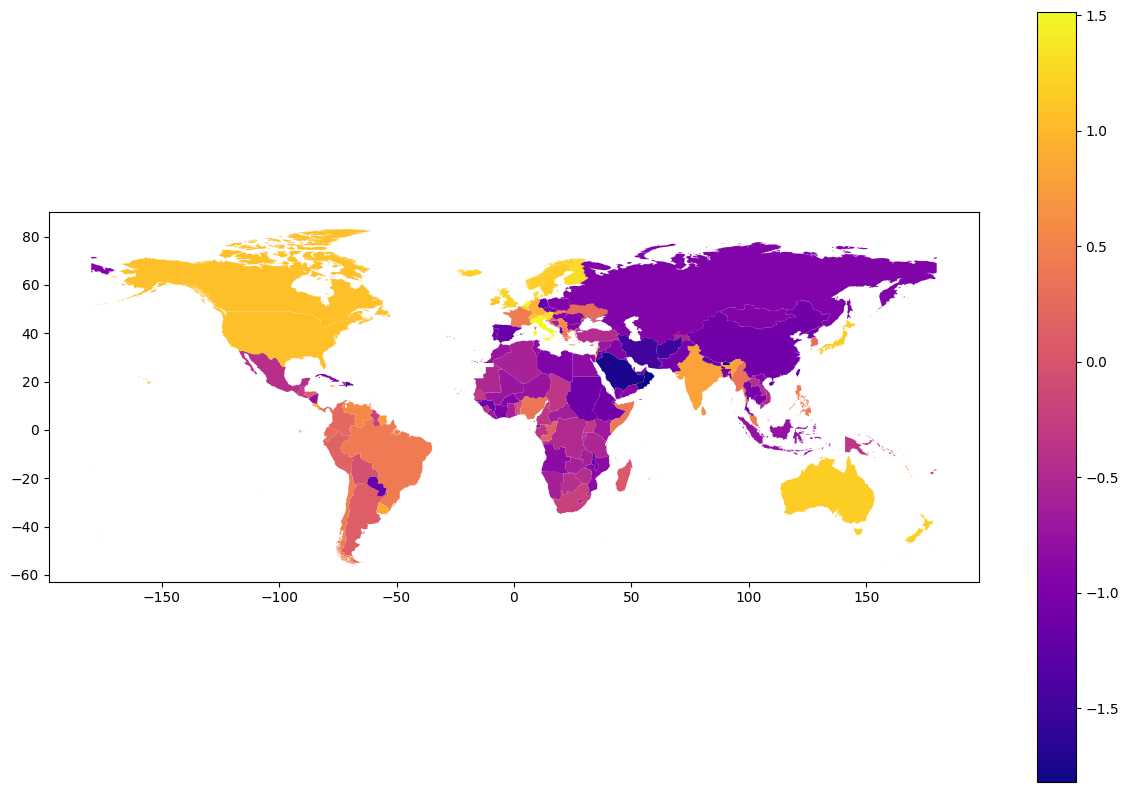

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
dash_prev.drop_duplicates(subset=['cntry_name'], keep='last').plot(column='pred_uds', cmap='plasma', ax=ax, legend=True, linewidth=0.35)

In [ ]:
#keeping only neccessary columns
dash_prev.drop(columns=['gwsyear', 'gweyear', 'country_name', 'country_text_id', 'country_id',], inplace=True)
dash_prev.head()

,cntry_name,geometry,year,v2x_mpi,e_lexical_index,v2x_libdem,v2x_civlib,v2xcl_rol,v2x_egaldem,e_fh_pr,e_fh_cl,e_fh_status,v2x_accountability,e_wb_pop,pred_cl,pred_pr,pred_status,pred_uds
0,Afghanistan,"POLYGON ((72.73387 37.13538, 72.72162 37.11266...",1960,0.0,1.0,0.059,0.208,0.185,0.056,NaN,NaN,NaN,-0.781,8996967.0,6.0,7.0,3.0,-1.505684
1,Afghanistan,"POLYGON ((72.73387 37.13538, 72.72162 37.11266...",1961,0.0,1.0,0.059,0.214,0.185,0.056,NaN,NaN,NaN,-0.747,9169406.0,6.0,7.0,3.0,-1.542122
2,Afghanistan,"POLYGON ((72.73387 37.13538, 72.72162 37.11266...",1962,0.0,1.0,0.059,0.214,0.185,0.056,NaN,NaN,NaN,-0.734,9351442.0,6.0,7.0,3.0,-1.541246
3,Afghanistan,"POLYGON ((72.73387 37.13538, 72.72162 37.11266...",1963,0.0,1.0,0.067,0.243,0.202,0.058,NaN,NaN,NaN,-0.671,9543200.0,6.0,7.0,3.0,-1.520119
4,Afghanistan,"POLYGON ((72.73387 37.13538, 72.72162 37.11266...",1964,0.0,2.0,0.097,0.284,0.220,0.074,NaN,NaN,NaN,-0.436,9744772.0,5.0,4.0,3.0,-1.039680


In [ ]:
dash_prev.to_file('country_factors.geojson', driver='GeoJSON')